In [128]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data via https://www.kaggle.com/gpreda/reddit-conspiracy-theory
df = pd.read_csv("reddit_ct.csv")

In [3]:
df

,title,score,id,url,comms_num,created,body,timestamp
0,"Jimmy Fallon might be in the closet gay, or Bi...",6,f2r2s5,https://www.reddit.com/r/ConspiracyTheory/comm...,15,1.581513e+09,Recently me and some of my friends have been n...,2020-02-12 15:17:50
1,NBA Players who are Part of the Secret Illuminati,11,f1b44j,https://youtu.be/osrWcunuMbQ,2,1.581266e+09,NaN,2020-02-09 18:41:12
2,Evidence that Suggests Wuhan Market was Not th...,25,f0tsly,https://www.reddit.com/r/ConspiracyTheory/comm...,15,1.581179e+09,"I have marked a rudimentary chart, each new in...",2020-02-08 18:27:15
3,"US Navy Vet - Worked in Afghanistan, Iraq, Sud...",2,f0dddo,https://i.redd.it/hp4x7l90ajf41.jpg,0,1.581095e+09,NaN,2020-02-07 19:05:26
4,New Details Show How Deeply Iowa Caucus App De...,7,ezzad1,https://theintercept.com/2020/02/04/iowa-caucu...,2,1.581024e+09,NaN,2020-02-06 23:18:15
...,...,...,...,...,...,...,...,...
1172,Comment,3,c6nq6do,NaN,0,1.350471e+09,"[Yeah, yeah. I know.](http://www.youtube.com/w...",2012-10-17 13:43:29
1173,Comment,2,c6nq1wx,NaN,0,1.350469e+09,The only thing I found in the filter when I go...,2012-10-17 13:18:51
1174,Comment,2,c6ar2eu,NaN,0,1.348112e+09,My god you were a mole the whole time !!,2012-09-20 06:36:00
1175,Comment,1,c5r6v1h,NaN,0,1.344627e+09,While many claim there is a move to a one worl...,2012-08-10 22:25:59


In [5]:
df.info

<bound method DataFrame.info of                                                   title  score       id  \
0     Jimmy Fallon might be in the closet gay, or Bi...      6   f2r2s5   
1     NBA Players who are Part of the Secret Illuminati     11   f1b44j   
2     Evidence that Suggests Wuhan Market was Not th...     25   f0tsly   
3     US Navy Vet - Worked in Afghanistan, Iraq, Sud...      2   f0dddo   
4     New Details Show How Deeply Iowa Caucus App De...      7   ezzad1   
...                                                 ...    ...      ...   
1172                                            Comment      3  c6nq6do   
1173                                            Comment      2  c6nq1wx   
1174                                            Comment      2  c6ar2eu   
1175                                            Comment      1  c5r6v1h   
1176                                            Comment      2  c5qpa92   

                                                    url  comms_num 

In [6]:
df.describe()

,score,comms_num,created
count,1177.000000,1177.000000,1.177000e+03
mean,1.737468,0.519116,1.520791e+09
std,1.819648,1.808385,6.353630e+07
min,-4.000000,0.000000,1.344545e+09
25%,1.000000,0.000000,1.508088e+09
50%,1.000000,0.000000,1.540925e+09
75%,2.000000,0.000000,1.567867e+09
max,25.000000,30.000000,1.596763e+09


In [9]:
df.sort_values(by = ['score'], ascending = False)

,title,score,id,url,comms_num,created,body,timestamp
2,Evidence that Suggests Wuhan Market was Not th...,25,f0tsly,https://www.reddit.com/r/ConspiracyTheory/comm...,15,1.581179e+09,"I have marked a rudimentary chart, each new in...",2020-02-08 18:27:15
7,A batch of quietly released documents confirms...,15,ewvdam,https://jacobinmag.com/2020/01/ronald-reagan-o...,1,1.580506e+09,NaN,2020-01-31 23:33:24
284,Our world is a sim Mandela Effect explained,13,7vtawt,https://www.reddit.com/r/ConspiracyTheory/comm...,7,1.517975e+09,"Ok say our world is a simulation, our ""subcons...",2018-02-07 05:41:01
220,Sounds like farming to me.,13,a36a8r,https://i.redd.it/lnlb45e5jc221.jpg,0,1.543966e+09,NaN,2018-12-05 01:32:32
5,Avast has been recording your browsing behavio...,12,ezfj1v,https://www.vice.com/en_us/article/qjdkq7/avas...,5,1.580933e+09,NaN,2020-02-05 22:09:23
...,...,...,...,...,...,...,...,...
1086,Comment,-1,cm200nx,NaN,0,1.415934e+09,I love your name.,2014-11-14 04:57:58
866,Comment,-1,dxm1wez,NaN,0,1.524117e+09,Why not just post the link?,2018-04-19 08:42:51
1113,Comment,-1,ccvjsak,NaN,0,1.382267e+09,It seems to me that your problems started when...,2013-10-20 14:07:08
1104,Comment,-1,cgigljk,NaN,0,1.396472e+09,proof of Photoshop confirmed. thank you op,2014-04-02 23:54:39


In [33]:
#get the title of the post with the highest score
df.loc[df.score == df.score.max()]

,title,score,id,url,comms_num,created,body,timestamp
2,Evidence that Suggests Wuhan Market was Not th...,25,f0tsly,https://www.reddit.com/r/ConspiracyTheory/comm...,15,1.581179e+09,"I have marked a rudimentary chart, each new in...",2020-02-08 18:27:15


## Try to see if there is a correlation between comments number and score.

In [53]:
#get a dataframe where the title is not Comments
no_com = df.loc[df['title'] != 'Comment']
no_com

,title,score,id,url,comms_num,created,body,timestamp
0,"Jimmy Fallon might be in the closet gay, or Bi...",6,f2r2s5,https://www.reddit.com/r/ConspiracyTheory/comm...,15,1.581513e+09,Recently me and some of my friends have been n...,2020-02-12 15:17:50
1,NBA Players who are Part of the Secret Illuminati,11,f1b44j,https://youtu.be/osrWcunuMbQ,2,1.581266e+09,NaN,2020-02-09 18:41:12
2,Evidence that Suggests Wuhan Market was Not th...,25,f0tsly,https://www.reddit.com/r/ConspiracyTheory/comm...,15,1.581179e+09,"I have marked a rudimentary chart, each new in...",2020-02-08 18:27:15
3,"US Navy Vet - Worked in Afghanistan, Iraq, Sud...",2,f0dddo,https://i.redd.it/hp4x7l90ajf41.jpg,0,1.581095e+09,NaN,2020-02-07 19:05:26
4,New Details Show How Deeply Iowa Caucus App De...,7,ezzad1,https://theintercept.com/2020/02/04/iowa-caucu...,2,1.581024e+09,NaN,2020-02-06 23:18:15
...,...,...,...,...,...,...,...,...
417,Theory on Romney winning. (not because I would...,0,12goxg,https://www.reddit.com/r/ConspiracyTheory/comm...,2,1.351787e+09,* Romney lies to Ohio voters about Jeep closin...,2012-11-01 18:18:42
418,Facebook Conspiracy Theory\n\n,0,128gro,https://www.reddit.com/r/ConspiracyTheory/comm...,0,1.351456e+09,Facebook thought that I had a virus. Being con...,2012-10-28 22:30:34
419,AutoModerator is set to approve everything.,0,11n4wp,https://www.reddit.com/r/ConspiracyTheory/comm...,0,1.350498e+09,"If we want it to do other things (e.g., remove...",2012-10-17 21:26:16
420,Is a one world government possible or stable?,0,y0fkg,http://alexk2009.hubpages.com/hub/Could-we-eve...,3,1.344627e+09,NaN,2012-08-10 22:24:46


In [54]:
comments = no_com.comms_num.copy()
comments
comments = comments.to_numpy()

In [55]:
score = no_com.score.copy()
score
score = score.to_numpy()

In [58]:
score.size
comments.size

422

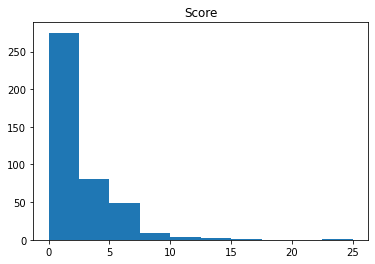

In [59]:
plt.hist(score, bins = 10)
plt.title('Score')
plt.show();

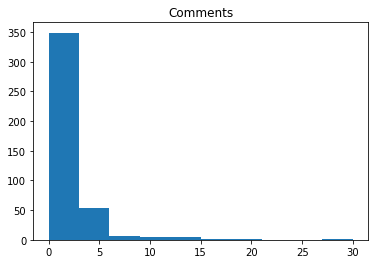

In [60]:
plt.hist(comments, bins = 10)
plt.title('Comments')
plt.show();

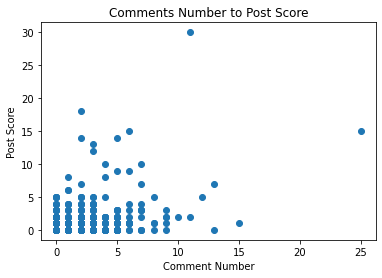

In [61]:
plt.scatter(score, comments)
plt.xlabel('Comment Number')
plt.ylabel('Post Score')
plt.title('Comments Number to Post Score')
plt.show();

In [62]:
plt.style.use("seaborn")
import seaborn as sns

In [63]:
#X is comments, Y is score
X = comments.astype(float)
Y = score.astype(float)

In [64]:
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

In [65]:
# calculate predicted Y
Yhat = a * X + b
print(Yhat)

[ 6.63946901  2.6118196   6.63946901  1.99218123  2.6118196   3.54127716
  2.6118196   2.30200041  1.99218123  1.99218123  2.30200041  1.99218123
 11.2867568   3.54127716  2.30200041  1.99218123  3.54127716  2.92163878
  1.99218123  2.92163878  1.99218123  1.99218123  2.30200041  1.99218123
  2.30200041  1.99218123  2.30200041  1.99218123  1.99218123  2.30200041
  1.99218123  2.30200041  2.30200041  2.30200041  1.99218123  2.30200041
  2.6118196   1.99218123  2.30200041  1.99218123  1.99218123  1.99218123
  1.99218123  2.30200041  2.30200041  1.99218123  2.6118196   2.30200041
  1.99218123  1.99218123  2.30200041  1.99218123  1.99218123  1.99218123
  2.6118196   2.6118196   2.30200041  1.99218123  1.99218123  2.30200041
  1.99218123  2.92163878  1.99218123  1.99218123  1.99218123  1.99218123
  1.99218123  1.99218123  1.99218123  1.99218123  1.99218123  1.99218123
  2.30200041  1.99218123  2.30200041  3.23145797  1.99218123  1.99218123
  2.30200041  1.99218123  1.99218123  2.30200041  1

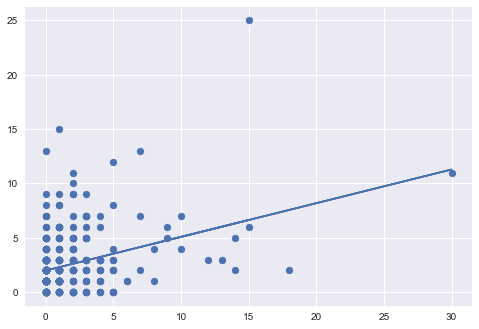

In [66]:
#plot it all
plt.scatter(X, Y)
plt.plot(X, Yhat) # line of best fit
plt.show();

In [67]:
#calculate r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("R-Squared is", r2)

R-Squared is 0.11238578168957114


## Try to see if there is a correlation between post length (body) and score.

In [68]:
df

,title,score,id,url,comms_num,created,body,timestamp
0,"Jimmy Fallon might be in the closet gay, or Bi...",6,f2r2s5,https://www.reddit.com/r/ConspiracyTheory/comm...,15,1.581513e+09,Recently me and some of my friends have been n...,2020-02-12 15:17:50
1,NBA Players who are Part of the Secret Illuminati,11,f1b44j,https://youtu.be/osrWcunuMbQ,2,1.581266e+09,NaN,2020-02-09 18:41:12
2,Evidence that Suggests Wuhan Market was Not th...,25,f0tsly,https://www.reddit.com/r/ConspiracyTheory/comm...,15,1.581179e+09,"I have marked a rudimentary chart, each new in...",2020-02-08 18:27:15
3,"US Navy Vet - Worked in Afghanistan, Iraq, Sud...",2,f0dddo,https://i.redd.it/hp4x7l90ajf41.jpg,0,1.581095e+09,NaN,2020-02-07 19:05:26
4,New Details Show How Deeply Iowa Caucus App De...,7,ezzad1,https://theintercept.com/2020/02/04/iowa-caucu...,2,1.581024e+09,NaN,2020-02-06 23:18:15
...,...,...,...,...,...,...,...,...
1172,Comment,3,c6nq6do,NaN,0,1.350471e+09,"[Yeah, yeah. I know.](http://www.youtube.com/w...",2012-10-17 13:43:29
1173,Comment,2,c6nq1wx,NaN,0,1.350469e+09,The only thing I found in the filter when I go...,2012-10-17 13:18:51
1174,Comment,2,c6ar2eu,NaN,0,1.348112e+09,My god you were a mole the whole time !!,2012-09-20 06:36:00
1175,Comment,1,c5r6v1h,NaN,0,1.344627e+09,While many claim there is a move to a one worl...,2012-08-10 22:25:59


In [145]:
body = df.body
body[8]

' [https://www.youtube.com/watch?v=Jx9VWZdryjE](https://www.youtube.com/watch?v=Jx9VWZdryjE)'

hi
nan
nan


In [148]:
bodyCount = []
for i in range(1177):
    t = body[i]
    if type(t) != str:
        if math.isnan(t):
            t = 0
            j = len(str(t))
            bodyCount.append(j)
    else:
        j = len(str(t))
        bodyCount.append(j)
len(bodyCount)

1177

In [149]:
for i in range(1177):
    if bodyCount[i] == 1:
        bodyCount[i] = 0
    else:
        bodyCount[i] = bodyCount[i] - 2

In [150]:
print(bodyCount)

[479, 0, 3476, 0, 0, 0, 0, 0, 89, 0, 0, 0, 212, 108, 0, 583, 817, 0, 61, 0, 0, 181, 113, 0, 1340, 0, 990, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 133, 1561, 0, 0, 580, 0, 0, 0, 2504, 0, 0, 613, 214, 0, 0, 0, 1371, 0, 439, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 88, 0, 111, 0, 0, 86, 1237, 0, 948, 0, 0, 0, 0, 0, 0, 0, 420, 0, 0, 1488, 997, 0, 0, 465, 0, 0, 259, 0, 24, 893, 0, 0, 0, 1413, 612, 0, 435, 0, 228, 1033, 1541, 1910, 1205, 735, 0, 540, 339, 0, 0, 2967, 0, 0, 230, 506, 144, 0, 620, 6794, 0, 0, 0, 63, 0, 0, 1914, 206, 273, 76, 0, 0, 3090, 0, 0, 0, 0, 0, 996, 0, 892, 0, 0, 365, 2065, 257, 341, 2280, 919, 0, 0, 0, 204, 609, 0, 0, 0, 210, 21, 583, 71, 122, 654, 1321, 1318, 263, 267, 67, 628, 2141, 298, 0, 0, 0, 818, 0, 0, 103, 1870, 0, 0, 0, 571, 1758, 0, 0, 1012, 0, 1510, 43, 0, 201, 269, 0, 297, 285, 0, 0, 132, 0, 0, 0, 0, 0, 0, 0, 0, 748, 0, 1415, 0, 363, 70, 0, 0, 183, 0, 0, 41, 0, 0, 0, 0, 141, 0, 57, 0, 0, 268, 147, 0, 0, 0, 1262, 675, 0, 48, 304, 370, 0, 115, 0, 945

In [154]:
bodyCount = np.array(bodyCount)
bodyCount.size

1177

In [156]:
score = df.score.copy()
score
score = score.to_numpy()
score.size

1177

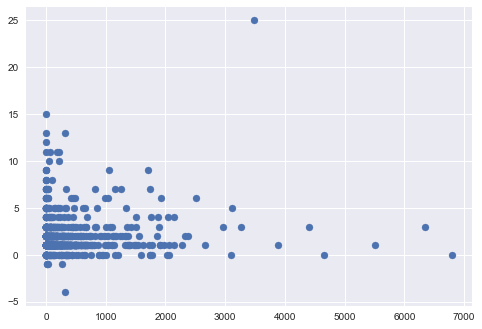

In [158]:
X = bodyCount
Y = score

plt.scatter(X, Y)
plt.show();

In [159]:
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

In [160]:
# calculate predicted Y
Yhat = a * X + b
print(Yhat)

[1.7966408  1.65860995 2.66027014 ... 1.6695602  1.70558078 1.66322058]


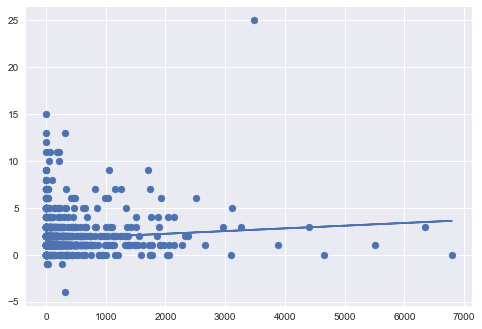

In [161]:
#plot it all
plt.scatter(X, Y)
plt.plot(X, Yhat) # line of best fit
plt.show();

In [162]:
#calculate r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("R-Squared is", r2)

R-Squared is 0.008113482791322402


## Try to see if there is a correlation between title length and score.

In [163]:
#get a dataframe where the title is not Comments
no_com = df.loc[df['title'] != 'Comment']
no_com

,title,score,id,url,comms_num,created,body,timestamp
0,"Jimmy Fallon might be in the closet gay, or Bi...",6,f2r2s5,https://www.reddit.com/r/ConspiracyTheory/comm...,15,1.581513e+09,Recently me and some of my friends have been n...,2020-02-12 15:17:50
1,NBA Players who are Part of the Secret Illuminati,11,f1b44j,https://youtu.be/osrWcunuMbQ,2,1.581266e+09,NaN,2020-02-09 18:41:12
2,Evidence that Suggests Wuhan Market was Not th...,25,f0tsly,https://www.reddit.com/r/ConspiracyTheory/comm...,15,1.581179e+09,"I have marked a rudimentary chart, each new in...",2020-02-08 18:27:15
3,"US Navy Vet - Worked in Afghanistan, Iraq, Sud...",2,f0dddo,https://i.redd.it/hp4x7l90ajf41.jpg,0,1.581095e+09,NaN,2020-02-07 19:05:26
4,New Details Show How Deeply Iowa Caucus App De...,7,ezzad1,https://theintercept.com/2020/02/04/iowa-caucu...,2,1.581024e+09,NaN,2020-02-06 23:18:15
...,...,...,...,...,...,...,...,...
417,Theory on Romney winning. (not because I would...,0,12goxg,https://www.reddit.com/r/ConspiracyTheory/comm...,2,1.351787e+09,* Romney lies to Ohio voters about Jeep closin...,2012-11-01 18:18:42
418,Facebook Conspiracy Theory\n\n,0,128gro,https://www.reddit.com/r/ConspiracyTheory/comm...,0,1.351456e+09,Facebook thought that I had a virus. Being con...,2012-10-28 22:30:34
419,AutoModerator is set to approve everything.,0,11n4wp,https://www.reddit.com/r/ConspiracyTheory/comm...,0,1.350498e+09,"If we want it to do other things (e.g., remove...",2012-10-17 21:26:16
420,Is a one world government possible or stable?,0,y0fkg,http://alexk2009.hubpages.com/hub/Could-we-eve...,3,1.344627e+09,NaN,2012-08-10 22:24:46


In [172]:
titles = no_com.title
score = no_com.score
titles

0      Jimmy Fallon might be in the closet gay, or Bi...
1      NBA Players who are Part of the Secret Illuminati
2      Evidence that Suggests Wuhan Market was Not th...
3      US Navy Vet - Worked in Afghanistan, Iraq, Sud...
4      New Details Show How Deeply Iowa Caucus App De...
                             ...                        
417    Theory on Romney winning. (not because I would...
418                       Facebook Conspiracy Theory\n\n
419          AutoModerator is set to approve everything.
420        Is a one world government possible or stable?
421    Oh, the drama and controversy. Well, let's get...
Name: title, Length: 422, dtype: object

In [169]:
titleCount = []
for i in range(422):
    t = titles[i]
    if type(t) != str:
        if math.isnan(t):
            t = 0
            j = len(str(t))
            titleCount.append(j)
    else:
        j = len(str(t))
        titleCount.append(j)
len(titleCount)

422

In [170]:
print(titleCount)

[52, 49, 140, 155, 94, 80, 67, 236, 12, 43, 34, 41, 18, 35, 157, 30, 27, 63, 38, 69, 35, 84, 35, 49, 148, 69, 66, 53, 163, 60, 63, 96, 84, 193, 84, 40, 69, 31, 22, 87, 49, 92, 118, 62, 71, 103, 60, 95, 71, 55, 36, 40, 73, 107, 19, 63, 57, 81, 80, 79, 86, 87, 107, 49, 89, 140, 163, 50, 63, 76, 82, 48, 73, 72, 53, 48, 36, 55, 16, 39, 36, 9, 159, 108, 33, 42, 24, 67, 46, 82, 93, 47, 18, 107, 54, 68, 23, 49, 42, 37, 33, 121, 66, 58, 94, 46, 32, 101, 177, 200, 43, 44, 48, 18, 21, 48, 54, 34, 32, 27, 120, 57, 91, 59, 41, 47, 18, 17, 29, 126, 61, 46, 51, 17, 40, 67, 75, 17, 61, 38, 5, 71, 28, 6, 61, 66, 57, 201, 200, 81, 166, 167, 23, 54, 16, 115, 113, 53, 68, 32, 88, 24, 77, 87, 41, 83, 71, 32, 163, 38, 136, 64, 77, 12, 44, 57, 98, 59, 34, 19, 161, 116, 41, 13, 20, 107, 33, 22, 32, 84, 33, 1, 28, 36, 53, 88, 37, 26, 75, 59, 22, 30, 50, 51, 37, 38, 46, 58, 70, 59, 21, 95, 27, 10, 127, 60, 40, 56, 46, 62, 26, 63, 50, 44, 50, 27, 90, 54, 35, 6, 32, 84, 112, 112, 75, 25, 30, 26, 106, 14, 83, 28,

In [174]:
titleCount = np.array(titleCount)
score = score.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [175]:
titleCount.size

422

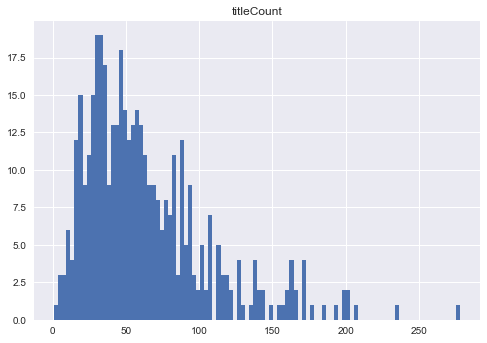

In [181]:
plt.hist(titleCount, bins = 100)
plt.title('titleCount')
plt.show();

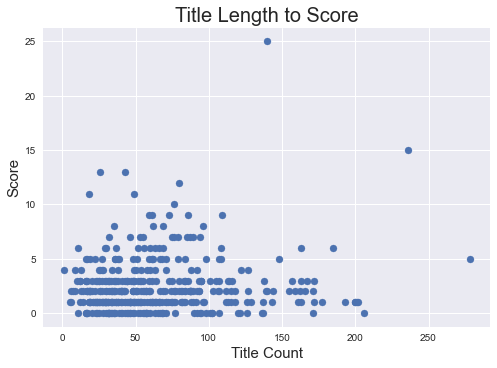

In [177]:
X = titleCount
Y = score

#basic scatterplot
plt.scatter(X,Y)
plt.xlabel("Title Count", fontsize = 15)
plt.ylabel("Score", fontsize = 15)
plt.title("Title Length to Score", fontsize = 20)
plt.show();

In [178]:
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

# calculate predicted Y
Yhat = a * X + b
print(Yhat)



[2.37232182 2.35434287 2.89970445 2.98959922 2.62402717 2.54012539
 2.46221659 3.47503097 2.13260244 2.31838496 2.2644481  2.30639899
 2.16856035 2.27044108 3.00158519 2.24047616 2.22249721 2.43824465
 2.28842004 2.47420256 2.27044108 2.56409732 2.27044108 2.35434287
 2.94764833 2.47420256 2.4562236  2.3783148  3.0375431  2.4202657
 2.43824465 2.63601314 2.56409732 3.21733263 2.56409732 2.30040601
 2.47420256 2.24646914 2.19253228 2.58207628 2.35434287 2.6120412
 2.7678588  2.43225166 2.48618852 2.67796403 2.4202657  2.63002015
 2.48618852 2.39030077 2.27643407 2.30040601 2.49817449 2.70193597
 2.17455333 2.43824465 2.40228674 2.54611837 2.54012539 2.5341324
 2.57608329 2.58207628 2.70193597 2.35434287 2.59406225 2.89970445
 3.0375431  2.36033585 2.43824465 2.51615345 2.55211135 2.34834988
 2.49817449 2.49218151 2.3783148  2.34834988 2.27643407 2.39030077
 2.15657438 2.29441302 2.27643407 2.11462349 3.01357116 2.70792895
 2.25845511 2.31239197 2.20451825 2.46221659 2.33636391 2.5521113

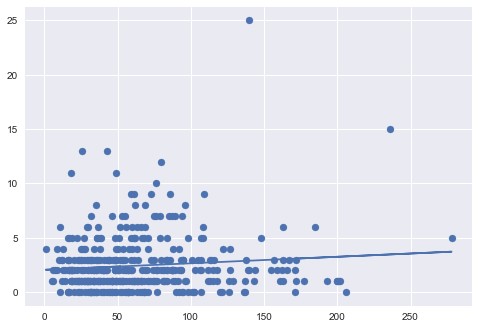

In [179]:
#plot it all
plt.scatter(X, Y)
plt.plot(X, Yhat) # line of best fit
plt.show();

In [180]:
#calculate r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("R-Squared is", r2)

R-Squared is 0.009907590069243577
